<a href="https://colab.research.google.com/github/DeeshaP26/Feynn-Labs-Internship-2024/blob/main/McDonalds_Market_Segmentation_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **`MARKET SEGMENTATION`**

In [59]:
#installing necessary packages
!pip install -U bioinfokit

In [60]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from bioinfokit.visuz import cluster
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing

**GETTING THE DATASET**

In [61]:
data=pd.read_csv('/content/drive/MyDrive/mcdonalds.csv')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [63]:
data.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

**DATA PROCESSING**

In [64]:
mcdonalds_new=data.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)
mcdonalds_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [65]:
MD_x=mcdonalds_new.apply(LabelEncoder().fit_transform)
MD_x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


**PERFORMING PCA ANALYSIS**

In [66]:
#Perform the PCA analaysis
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(MD_x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']

# correlation coefficient between original variables and the component
loadings_df = pd.DataFrame(data = principalComponents, columns = names)
loadings_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [67]:
# Print the importance of components
print("Importance of components:")
print("Standard deviation:", pca.explained_variance_)
print("Proportion of Variance:", pca.explained_variance_ratio_)
print("Cumulative Proportion:", np.cumsum(pca.explained_variance_ratio_))

Importance of components:
Standard deviation: [0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]
Proportion of Variance: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Proportion: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [68]:
# Get the rotation (components) matrix
rotation = pca.components_.T

# Simulated feature names
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
            'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Create a DataFrame for the rotation matrix
rotation_df = pd.DataFrame(rotation, index=features, columns=[f'PC{i+1}' for i in range(rotation.shape[1])])

# Round the values to match the R output
std_devs = np.sqrt(pca.explained_variance_)
std_devs_rounded = np.round(std_devs, 1)
rotation_df_rounded = rotation_df.round(3)

# Print the standard deviations
print("Standard deviations (1, .., p=11):")
print(std_devs_rounded)

# Print the rotation matrix
print("\nRotation (n x k) = (11 x 11):")
rotation_df_rounded



Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (n x k) = (11 x 11):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,0.055,-0.308,0.171,-0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,-0.142,0.278,-0.348,-0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,0.198,0.071,-0.355,0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,-0.354,-0.073,-0.407,-0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,0.254,0.361,0.209,0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,-0.097,0.108,-0.595,-0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,0.119,-0.129,-0.103,-0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,-0.003,-0.211,-0.077,0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,0.068,-0.003,-0.261,-0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,0.763,0.288,-0.178,-0.350,0.176,-0.186,-0.038,0.158


<Axes: >

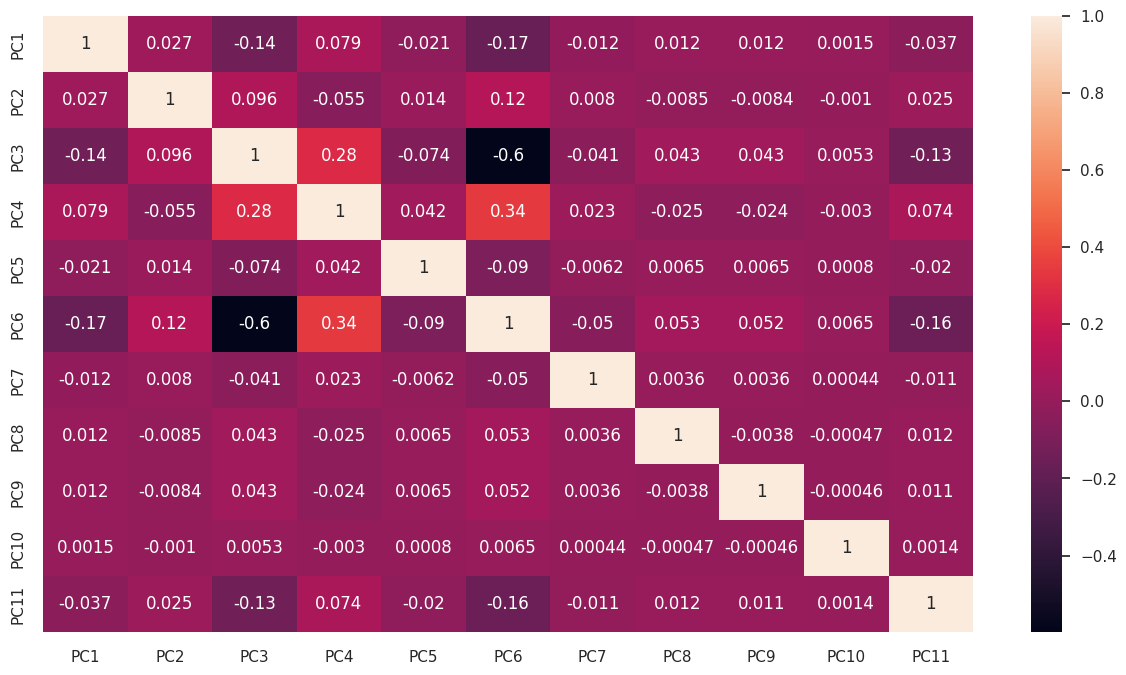

In [69]:
plt.figure(figsize=(15, 8))
sns.heatmap(rotation_df.corr(), annot = True)

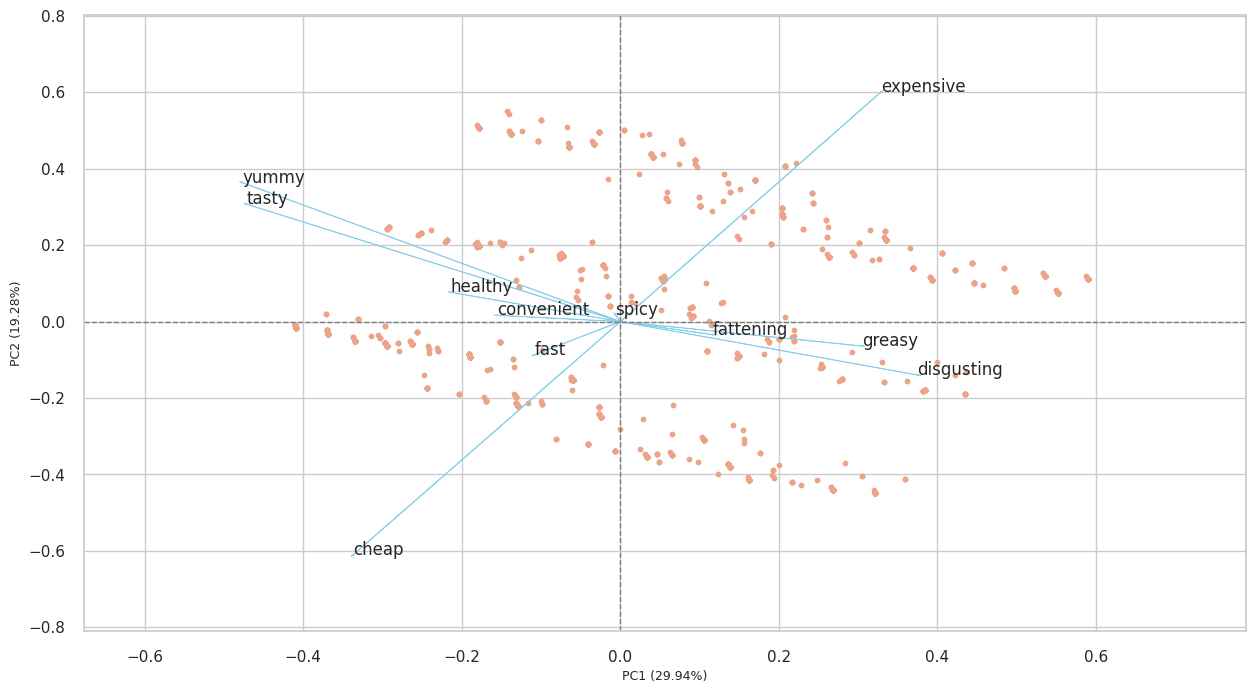

In [70]:
# get 2D biplot
cluster.biplot(cscore=principalComponents, loadings=pca.components_, labels=mcdonalds_new.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),dotsize=10,
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(15,8))


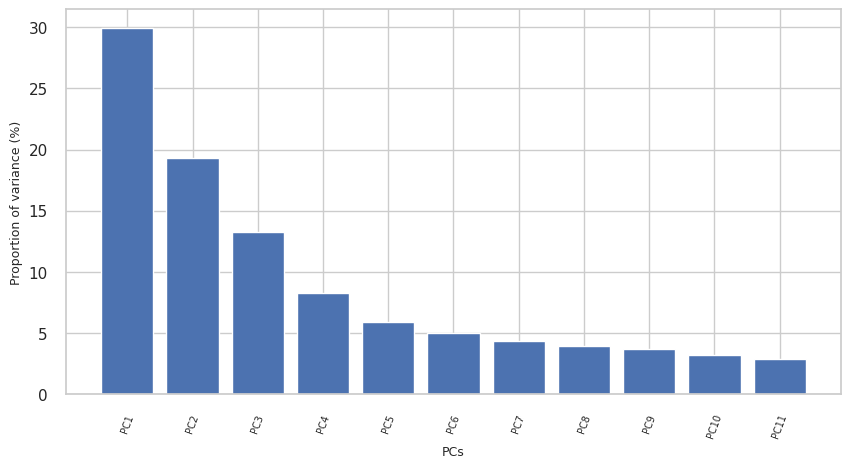

In [71]:
cluster.screeplot(obj=[rotation_df.columns, pca.explained_variance_ratio_],show=True,dim=(10,5))
plt.show()

**USING KMEANS CLUSTERING ALGORITHM**

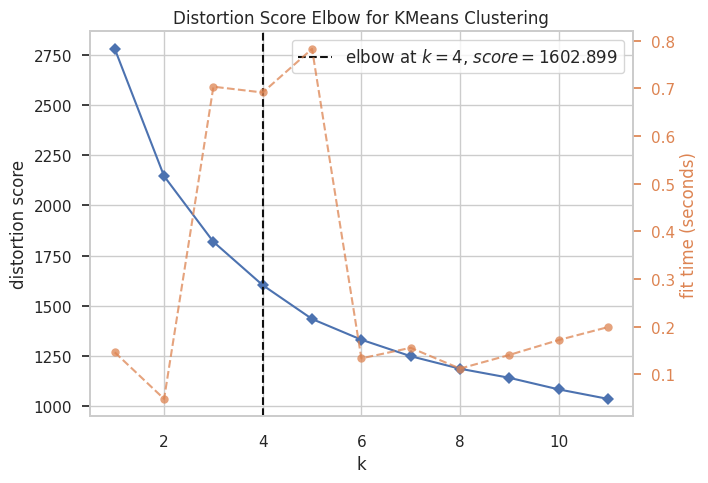

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
# Plot the elbow method results and the silhoutte score.
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1,12)).fit(MD_x)
visualizer.show()

**PROFILING THE SEGMENTS**

In [73]:
from sklearn.cluster import KMeans # Import KMeans package
from sklearn.metrics import silhouette_score # Import silhouette_score package
k_vals = range(2, 8) # Create a range of k values
inertias = [] # Create an empty list to store the inertia values
silhoutte_scores = [] # Create an empty list to store the silhouette scores

for k_val in k_vals:
    kmeans = KMeans(n_clusters=k_val, n_init="auto") # Create a KMeans object with k clusters
    kmeans.fit(MD_x) # Fit the data to the KMeans object
    inertias.append(kmeans.inertia_) # Append the inertia to the list

    slht_score = silhouette_score(MD_x, kmeans.labels_) # Calculate the silhouette score
    silhoutte_scores.append(slht_score) # Append the silhouette score to the list

In [74]:
segment_profiles = []
cluster_labels = kmeans.labels_

for cluster in range(4):  # Change to the actual number of clusters
    segment_data = MD_x[cluster_labels == cluster]
    segment_profile = np.mean(segment_data, axis=0)  # You can also use np.median
    segment_profiles.append(segment_profile)

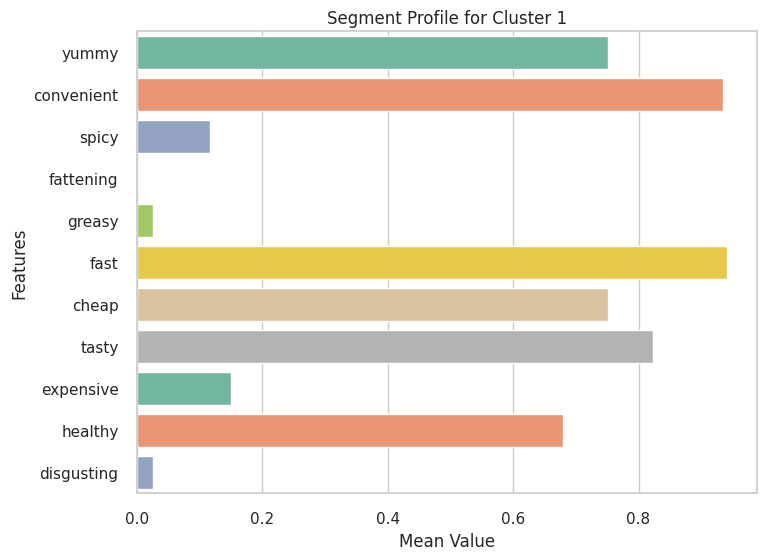

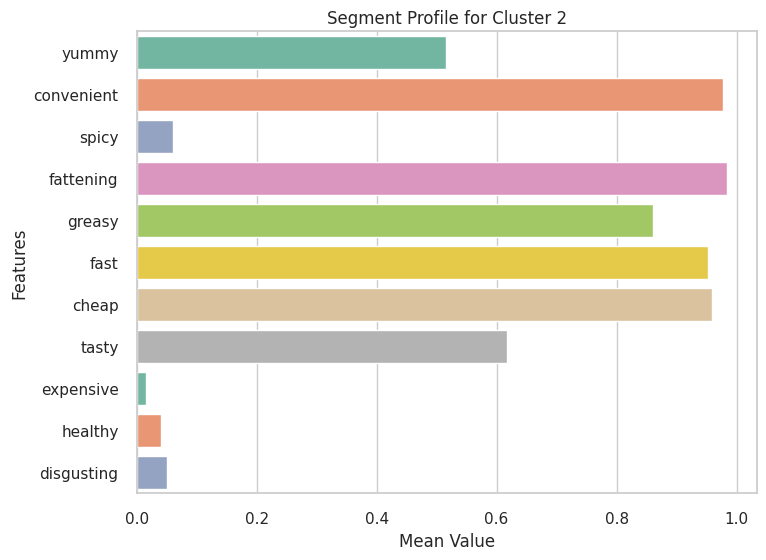

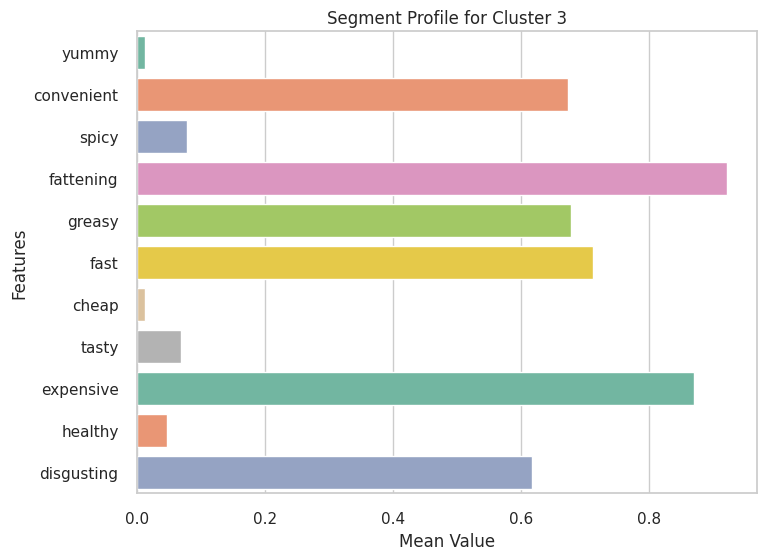

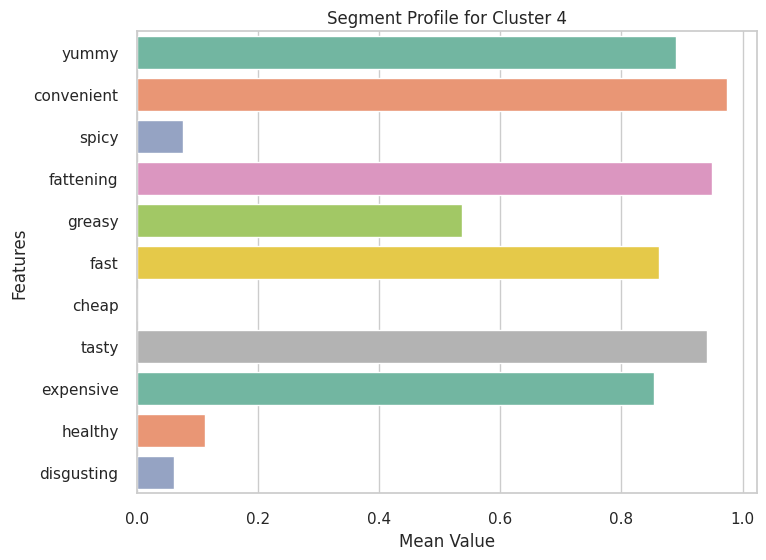

In [75]:
# Assuming you have feature names as a list
feature_names = MD_x.columns.tolist()

# Create a DataFrame for the segment profiles
segment_df = pd.DataFrame(segment_profiles, columns=feature_names)

# Use Seaborn to create a bar plot for each cluster
sns.set(style="whitegrid")
for cluster in range(4):
    plt.figure(figsize=(8, 6))
    sns.barplot(data=segment_df.loc[[cluster]], orient='h', palette='Set2')
    plt.ylabel('Features')
    plt.xlabel('Mean Value')
    plt.title(f'Segment Profile for Cluster {cluster + 1}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


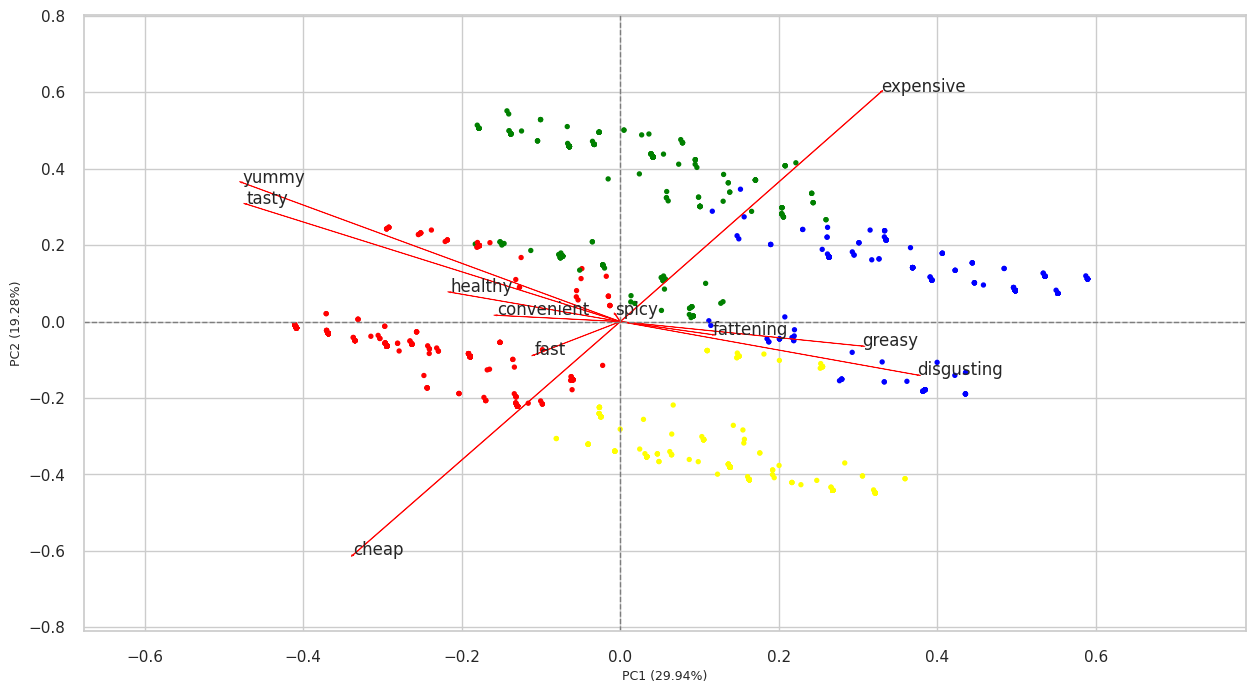

In [76]:
from bioinfokit.visuz import cluster
# Set KMeans to form 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(MD_x)

# Perform PCA on the original data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(MD_x)
pca_components_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

# Map cluster numbers to colors
color_map = {0: "red", 1: "blue", 2: "green", 3: "yellow"}

pca_components_df["Cluster_num"] = kmeans.labels_
colors = pca_components_df["Cluster_num"].map(color_map).values

# Plot the PC1 and PC2 with the colors as labels and label the classes
cluster.biplot(
    cscore=pca_components,
    loadings=pca.components_,
    labels=data.columns.values,
    colordot=colors,
    var1=round(pca.explained_variance_ratio_[0]*100, 2),
    dotsize=8,
    var2=round(pca.explained_variance_ratio_[1]*100, 2),
    arrowcolor="red",
    show=True,
    dim=(15, 8)
)


**DESCRIBING SEGMENTS**

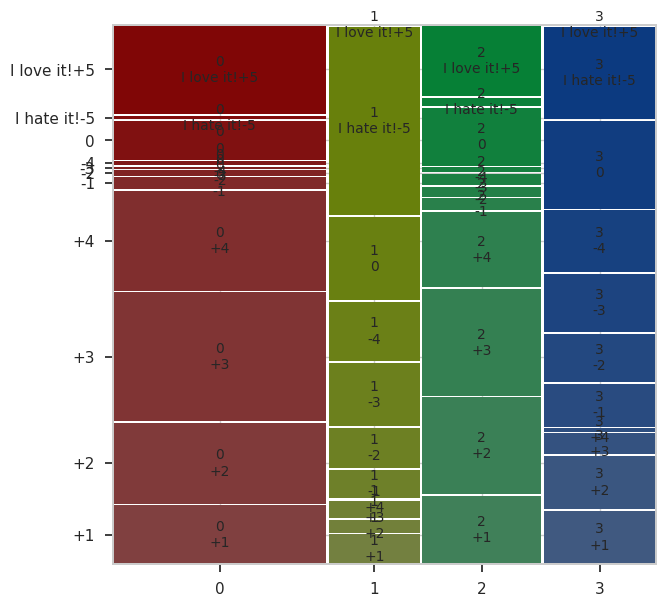

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,65,90,143,111,13,6,2,4,43,4,99
1,14,6,8,0,13,19,30,28,39,89,0
2,42,60,66,47,7,6,7,3,36,5,44
3,31,31,12,2,25,28,34,36,51,54,0


None

In [77]:
# crosstab creation
data_mosaic = data.copy()
data_mosaic['cluster_num'] = kmeans.labels_
crosstab = pd.crosstab(data_mosaic['cluster_num'], data_mosaic['Like'])

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

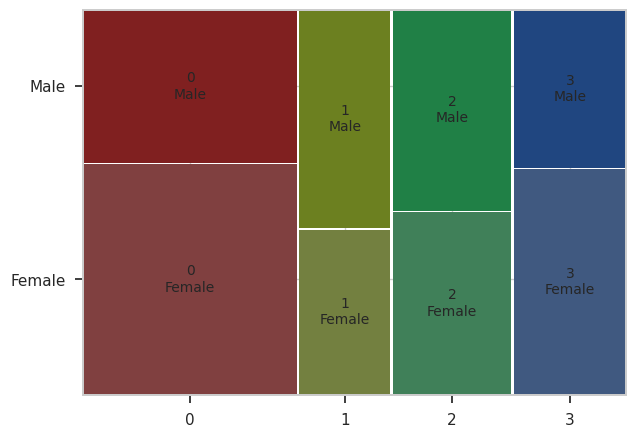

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,65,90,143,111,13,6,2,4,43,4,99
1,14,6,8,0,13,19,30,28,39,89,0
2,42,60,66,47,7,6,7,3,36,5,44
3,31,31,12,2,25,28,34,36,51,54,0


None

In [78]:
# crosstab creation
crosstab_gender = pd.crosstab(data_mosaic['cluster_num'],data_mosaic['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

**SELECTING THE TARGET SEGMENTS**

In [79]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [80]:
target_segment_data = data.copy()
target_segment_data["Cluster_num"] = kmeans.labels_

In [81]:
target_segment_data["Like"] = encoder.fit_transform(target_segment_data[["Like"]])
target_segment_data["VisitFrequency"] = encoder.fit_transform(target_segment_data[["VisitFrequency"]])
gender_data = target_segment_data.groupby("Cluster_num")["Gender"].value_counts().sort_index().unstack()

Text(0.5, 1.0, 'Target Segment')

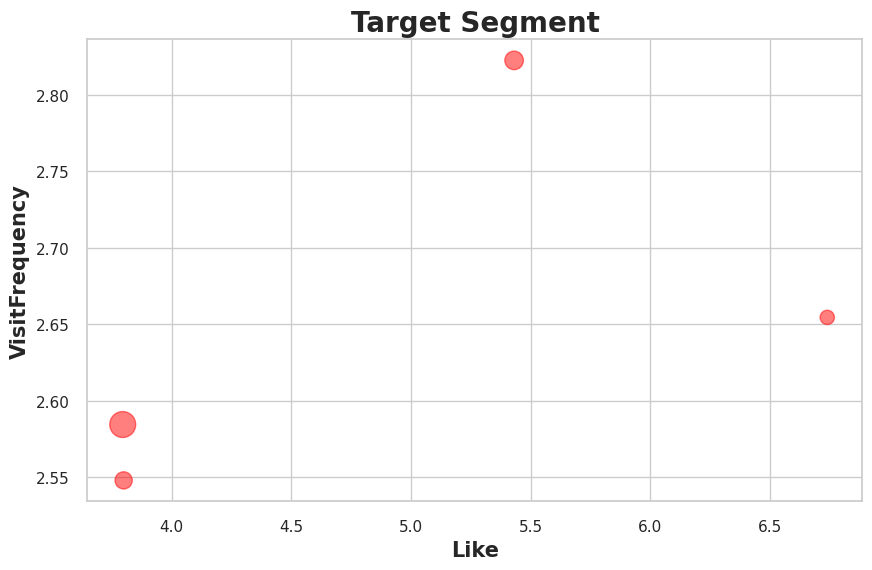

In [82]:
x_pts = target_segment_data.groupby("Cluster_num")["Like"].mean()
y_pts = target_segment_data.groupby("Cluster_num")["VisitFrequency"].mean()

plt.figure(figsize=(10, 6))
sizes = gender_data["Female"]
plt.scatter(x_pts, y_pts, s=sizes, c="red", alpha=0.5)
plt.xlabel("Like", fontsize=15, fontweight="bold")
plt.ylabel("VisitFrequency", fontsize=15, fontweight="bold")
plt.title("Target Segment", fontsize=20, fontweight="bold")